# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [1]:
print("Сиды фиксируем, чтобы можно было сравнивать результаты и проверять")

Сиды фиксируем, чтобы можно было сравнивать результаты при одинаковом разбиении данных на два блока: train и test


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [33]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [34]:
df_train.filter(items=random.sample(range(df_train.shape[1]), 10), axis=0)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
8,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
10,Maruti Zen LX,2005,92000,100000,Petrol,Individual,Manual,Second Owner,17.3 kmpl,993 CC,60 bhp,78Nm@ 4500rpm,5.0
12,Maruti Swift 1.3 VXi,2007,200000,80000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
6,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
11,Maruti Swift Dzire VDi,2009,280000,140000,Diesel,Individual,Manual,Second Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
7,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [4]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [5]:
df_train.describe(include=[np.number])

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
df_train.describe(include=[object])

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [30]:
df_train.isna().sum().sum()

1120

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [6]:
df_train_without_target = df_train.filter(items=[i for i in df_train.keys() if i != 'selling_price'], axis = 1)
bool_series = df_train_without_target.duplicated()
df_train_without_target[~bool_series]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [9]:
df_train[~bool_series]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [7]:
df_train = df_train[~bool_series]
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [11]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [8]:
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [9]:
df_train['mileage'] = df_train['mileage'].replace(to_replace ='[\/a-zA-Z\/]+', value = '', regex = True)
df_train['mileage'] = df_train['mileage'].astype('float')
df_test['mileage'] = df_test['mileage'].replace(to_replace ='[\/a-zA-Z\/]+', value = '', regex = True)
df_test['mileage'] = df_test['mileage'].astype('float')

In [14]:
df_train['mileage']

0       23.40
1       21.14
2       23.00
3       16.10
4       20.14
        ...  
5835    17.92
5836    18.90
5837    18.50
5838    16.80
5839    19.30
Name: mileage, Length: 5840, dtype: float64

In [15]:
df_test['mileage']

0      14.00
1      21.50
2      12.90
3      25.10
4      16.50
       ...  
995    19.81
996    18.60
997    23.00
998    20.36
999    26.00
Name: mileage, Length: 1000, dtype: float64

In [10]:
df_train['engine'] = df_train['engine'].replace(to_replace ='[\/a-zA-Z\/]+', value = '', regex = True)
df_train['engine'] = df_train['engine'].astype('float')
df_test['engine']  = df_test['engine'].replace(to_replace ='[\/a-zA-Z\/]+', value = '', regex = True)
df_test['engine'] = df_test['engine'].astype('float')

In [17]:
df_train['engine']

0       1248.0
1       1498.0
2       1396.0
3       1298.0
4       1197.0
         ...  
5835    1086.0
5836     998.0
5837    1197.0
5838    1493.0
5839    1248.0
Name: engine, Length: 5840, dtype: float64

In [18]:
df_test['engine']

0      2498.0
1      1497.0
2      1799.0
3      1498.0
4      1172.0
        ...  
995    1086.0
996    1197.0
997    1396.0
998    1197.0
999    1498.0
Name: engine, Length: 1000, dtype: float64

In [11]:
df_train['max_power'] = df_train['max_power'].replace(to_replace ='[ \/a-zA-Z\/]+', value = '', regex = True)
df_train['max_power'] = df_train['max_power'].replace(to_replace ='', value = None, regex = True)
df_train['max_power'] = df_train['max_power'].astype('float')
df_test['max_power'] = df_test['max_power'].replace(to_replace ='[ \/a-zA-Z\/]+', value = '', regex = True)
df_test['max_power'] = df_test['max_power'].replace(to_replace ='', value = None, regex = True)
df_test['max_power'] = df_test['max_power'].astype('float')

In [20]:
df_train['max_power']

0        74.00
1       103.52
2        90.00
3        88.20
4        81.86
         ...  
5835     62.10
5836     67.10
5837     82.85
5838    110.00
5839     73.90
Name: max_power, Length: 5840, dtype: float64

In [24]:
df_test['max_power']

0      112.00
1      108.50
2      130.00
3       98.60
4       65.00
        ...  
995     68.05
996     81.83
997     90.00
998     78.90
999     98.60
Name: max_power, Length: 1000, dtype: float64

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [25]:
df_train['torque']

0                  190Nm@ 2000rpm
1             250Nm@ 1500-2500rpm
2        22.4 kgm at 1750-2750rpm
3           11.5@ 4,500(kgm@ rpm)
4               113.75nm@ 4000rpm
                  ...            
5835              96.1Nm@ 3000rpm
5836                90Nm@ 3500rpm
5837             113.7Nm@ 4000rpm
5838    24@ 1,900-2,750(kgm@ rpm)
5839               190Nm@ 2000rpm
Name: torque, Length: 5840, dtype: object

In [12]:
import re
max_speed_torque_list = []
torque_list = []
for i in range(len(df_train['torque'])):
    try:
        reg = re.findall(r'\d+[,.0-9+-~@knNa]+', df_train['torque'][i])
        if len(reg) == 2:
            torque = re.findall(r'\d+', reg[0])
            if len(torque) > 1:
                torque = float('.'.join(torque))
            else:
                torque = float(torque[0])
            if len(re.findall(r'kgm', df_train['torque'][i])) > 0:
                torque *= 9.8067
            torque_list.append(torque)
            max_speed_torque = re.findall(r'\d+', reg[1])
            if len(max_speed_torque) == 1:
                max_speed_torque = float(max_speed_torque[0])
            elif float(max_speed_torque[1]) < 1000:
                if float(max_speed_torque[0]) > 1000:
                    max_speed_torque = float(max_speed_torque[0]) + float(max_speed_torque[1])
                else:
                    max_speed_torque = float(max_speed_torque[0] + max_speed_torque[1])
            else:
                max_speed_torque = float(max_speed_torque[1])
            max_speed_torque_list.append(max_speed_torque)
        else:
            max_speed_torque_list.append(None)
            torque_list.append(torque)
    except:
        max_speed_torque_list.append(None)
        torque_list.append(None)
        pass
df_train['torque'] = torque_list
df_train['max_torque_rpm'] = max_speed_torque_list

In [22]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.00000,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.00000,5.0,2500.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.67008,5.0,2750.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,112.77705,5.0,4500.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75000,5.0,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.10000,5.0,3000.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90.00000,5.0,3500.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.70000,5.0,4000.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,235.36080,5.0,1900.0


In [13]:
import re
max_speed_torque_list = []
torque_list = []
for i in range(len(df_test['torque'])):
    try:
        reg = re.findall(r'\d+[,.0-9+-~@knNa]+', df_test['torque'][i])
        if len(reg) == 2:
            torque = re.findall(r'\d+', reg[0])
            if len(torque) > 1:
                torque = float('.'.join(torque))
            else:
                torque = float(torque[0])
            if len(re.findall(r'kgm', df_test['torque'][i])) > 0:
                torque *= 9.8067
            torque_list.append(torque)
            max_speed_torque = re.findall(r'\d+', reg[1])
            if len(max_speed_torque) == 1:
                max_speed_torque = float(max_speed_torque[0])
            elif float(max_speed_torque[1]) < 1000:
                if float(max_speed_torque[0]) > 1000:
                    max_speed_torque = float(max_speed_torque[0]) + float(max_speed_torque[1])
                else:
                    max_speed_torque = float(max_speed_torque[0] + max_speed_torque[1])
            else:
                max_speed_torque = float(max_speed_torque[1])
            max_speed_torque_list.append(max_speed_torque)
        else:
            max_speed_torque_list.append(None)
            torque_list.append(torque)
    except:
        max_speed_torque_list.append(None)
        torque_list.append(None)
        pass
df_test['torque'] = torque_list
df_test['max_torque_rpm'] = max_speed_torque_list

In [24]:
df_test

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.00,2498.0,112.00,260.00000,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.50,1497.0,108.50,260.00000,5.0,2750.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.90,1799.0,130.00,172.00000,5.0,4300.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.10,1498.0,98.60,200.00000,5.0,1750.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.50,1172.0,65.00,96.00000,5.0,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81,1086.0,68.05,99.04000,5.0,4500.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.60,1197.0,81.83,114.70000,5.0,4000.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,219.67008,5.0,2750.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36,1197.0,78.90,111.80000,5.0,4000.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [14]:
# для удобства работы с нашим датасетом создаем маску, указывающую на столбцы с категориальными признаками
cat_features_mask_train = (df_train.dtypes == "object").values # категориальные признаки имеют тип "object"
cat_features_mask_test = (df_test.dtypes == "object").values # категориальные признаки имеют тип "object"
from sklearn import impute

In [15]:
# для вещественнозначных признаков заполним пропуски медианами
df_train_real = df_train[df_train.columns[~cat_features_mask_train]]
df_test_real = df_test[df_test.columns[~cat_features_mask_test]]
mis_replacer = impute.SimpleImputer(strategy="median")
df_train_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(df_train_real), columns=df_train_real.columns)
df_test_no_mis_real = pd.DataFrame(data=mis_replacer.fit_transform(df_test_real), columns=df_test_real.columns)

# для категориальных - пустыми строками
df_train_cat = df_train[df_train.columns[cat_features_mask_train]].fillna("")
df_train_cat.reset_index(drop=True, inplace=True)
df_test_cat = df_test[df_test.columns[cat_features_mask_test]].fillna("")
df_test_cat.reset_index(drop=True, inplace=True)

df_train_no_mis = pd.concat([df_train_no_mis_real, df_train_cat], axis=1)
df_test_no_mis = pd.concat([df_test_no_mis_real, df_test_cat], axis=1)

In [27]:
df_train_no_mis.isna().sum()

year              0
selling_price     0
km_driven         0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
name              0
fuel              0
seller_type       0
transmission      0
owner             0
dtype: int64

In [28]:
df_test_no_mis.isna().sum()

year              0
selling_price     0
km_driven         0
mileage           0
engine            0
max_power         0
torque            0
seats             0
max_torque_rpm    0
name              0
fuel              0
seller_type       0
transmission      0
owner             0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [16]:
df_train_no_mis['engine'] = df_train_no_mis['engine'].astype('int')
df_train_no_mis['seats'] = df_train_no_mis['seats'].astype('int')
df_test_no_mis['engine'] = df_test_no_mis['engine'].astype('int')
df_test_no_mis['seats'] = df_test_no_mis['seats'].astype('int')

In [30]:
df_train_no_mis

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,name,fuel,seller_type,transmission,owner
0,2014.0,450000.0,145500.0,23.40,1248,74.00,190.00000,5,2000.0,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner
1,2014.0,370000.0,120000.0,21.14,1498,103.52,250.00000,5,2500.0,Skoda Rapid 1.5 TDI Ambition,Diesel,Individual,Manual,Second Owner
2,2010.0,225000.0,127000.0,23.00,1396,90.00,219.67008,5,2750.0,Hyundai i20 Sportz Diesel,Diesel,Individual,Manual,First Owner
3,2007.0,130000.0,120000.0,16.10,1298,88.20,112.77705,5,4500.0,Maruti Swift VXI BSIII,Petrol,Individual,Manual,First Owner
4,2017.0,440000.0,45000.0,20.14,1197,81.86,113.75000,5,4000.0,Hyundai Xcent 1.2 VTVT E Plus,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008.0,120000.0,191000.0,17.92,1086,62.10,96.10000,5,3000.0,Hyundai Santro Xing GLS,Petrol,Individual,Manual,First Owner
5836,2013.0,260000.0,50000.0,18.90,998,67.10,90.00000,5,3500.0,Maruti Wagon R VXI BS IV with ABS,Petrol,Individual,Manual,Second Owner
5837,2013.0,320000.0,110000.0,18.50,1197,82.85,113.70000,5,4000.0,Hyundai i20 Magna,Petrol,Individual,Manual,First Owner
5838,2007.0,135000.0,119000.0,16.80,1493,110.00,235.36080,5,1900.0,Hyundai Verna CRDi SX,Diesel,Individual,Manual,Fourth & Above Owner


In [31]:
df_test_no_mis

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,name,fuel,seller_type,transmission,owner
0,2010.0,229999.0,168000.0,14.00,2498,112.00,260.00000,7,2200.0,Mahindra Xylo E4 BS IV,Diesel,Individual,Manual,First Owner
1,2017.0,665000.0,25000.0,21.50,1497,108.50,260.00000,5,2750.0,Tata Nexon 1.5 Revotorq XE,Diesel,Individual,Manual,First Owner
2,2007.0,175000.0,218463.0,12.90,1799,130.00,172.00000,5,4300.0,Honda Civic 1.8 S AT,Petrol,Individual,Automatic,First Owner
3,2015.0,635000.0,173000.0,25.10,1498,98.60,200.00000,5,1750.0,Honda City i DTEC VX,Diesel,Individual,Manual,First Owner
4,2011.0,130000.0,70000.0,16.50,1172,65.00,96.00000,5,3000.0,Tata Indica Vista Aura 1.2 Safire BSIV,Petrol,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2008.0,250000.0,100000.0,19.81,1086,68.05,99.04000,5,4500.0,Hyundai i10 Magna 1.1L,Petrol,Individual,Manual,Second Owner
996,2017.0,440000.0,50000.0,18.60,1197,81.83,114.70000,5,4000.0,Hyundai i20 2015-2017 Sportz 1.2,Petrol,Individual,Manual,Second Owner
997,2009.0,340000.0,40000.0,23.00,1396,90.00,219.67008,5,2750.0,Hyundai i20 Era Diesel,Diesel,Individual,Manual,First Owner
998,2012.0,350000.0,25000.0,20.36,1197,78.90,111.80000,5,4000.0,Hyundai i10 Asta,Petrol,Individual,Manual,First Owner


🦉 **Ответ:** Количество мест в салоне можно рассматривать как категориальный признак потому, что есть аналогия с уровнем комфортности автомобиля, т.е. чем больше мест, тем выше уровень комфорта ('econom', 'comfort', 'lux').

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

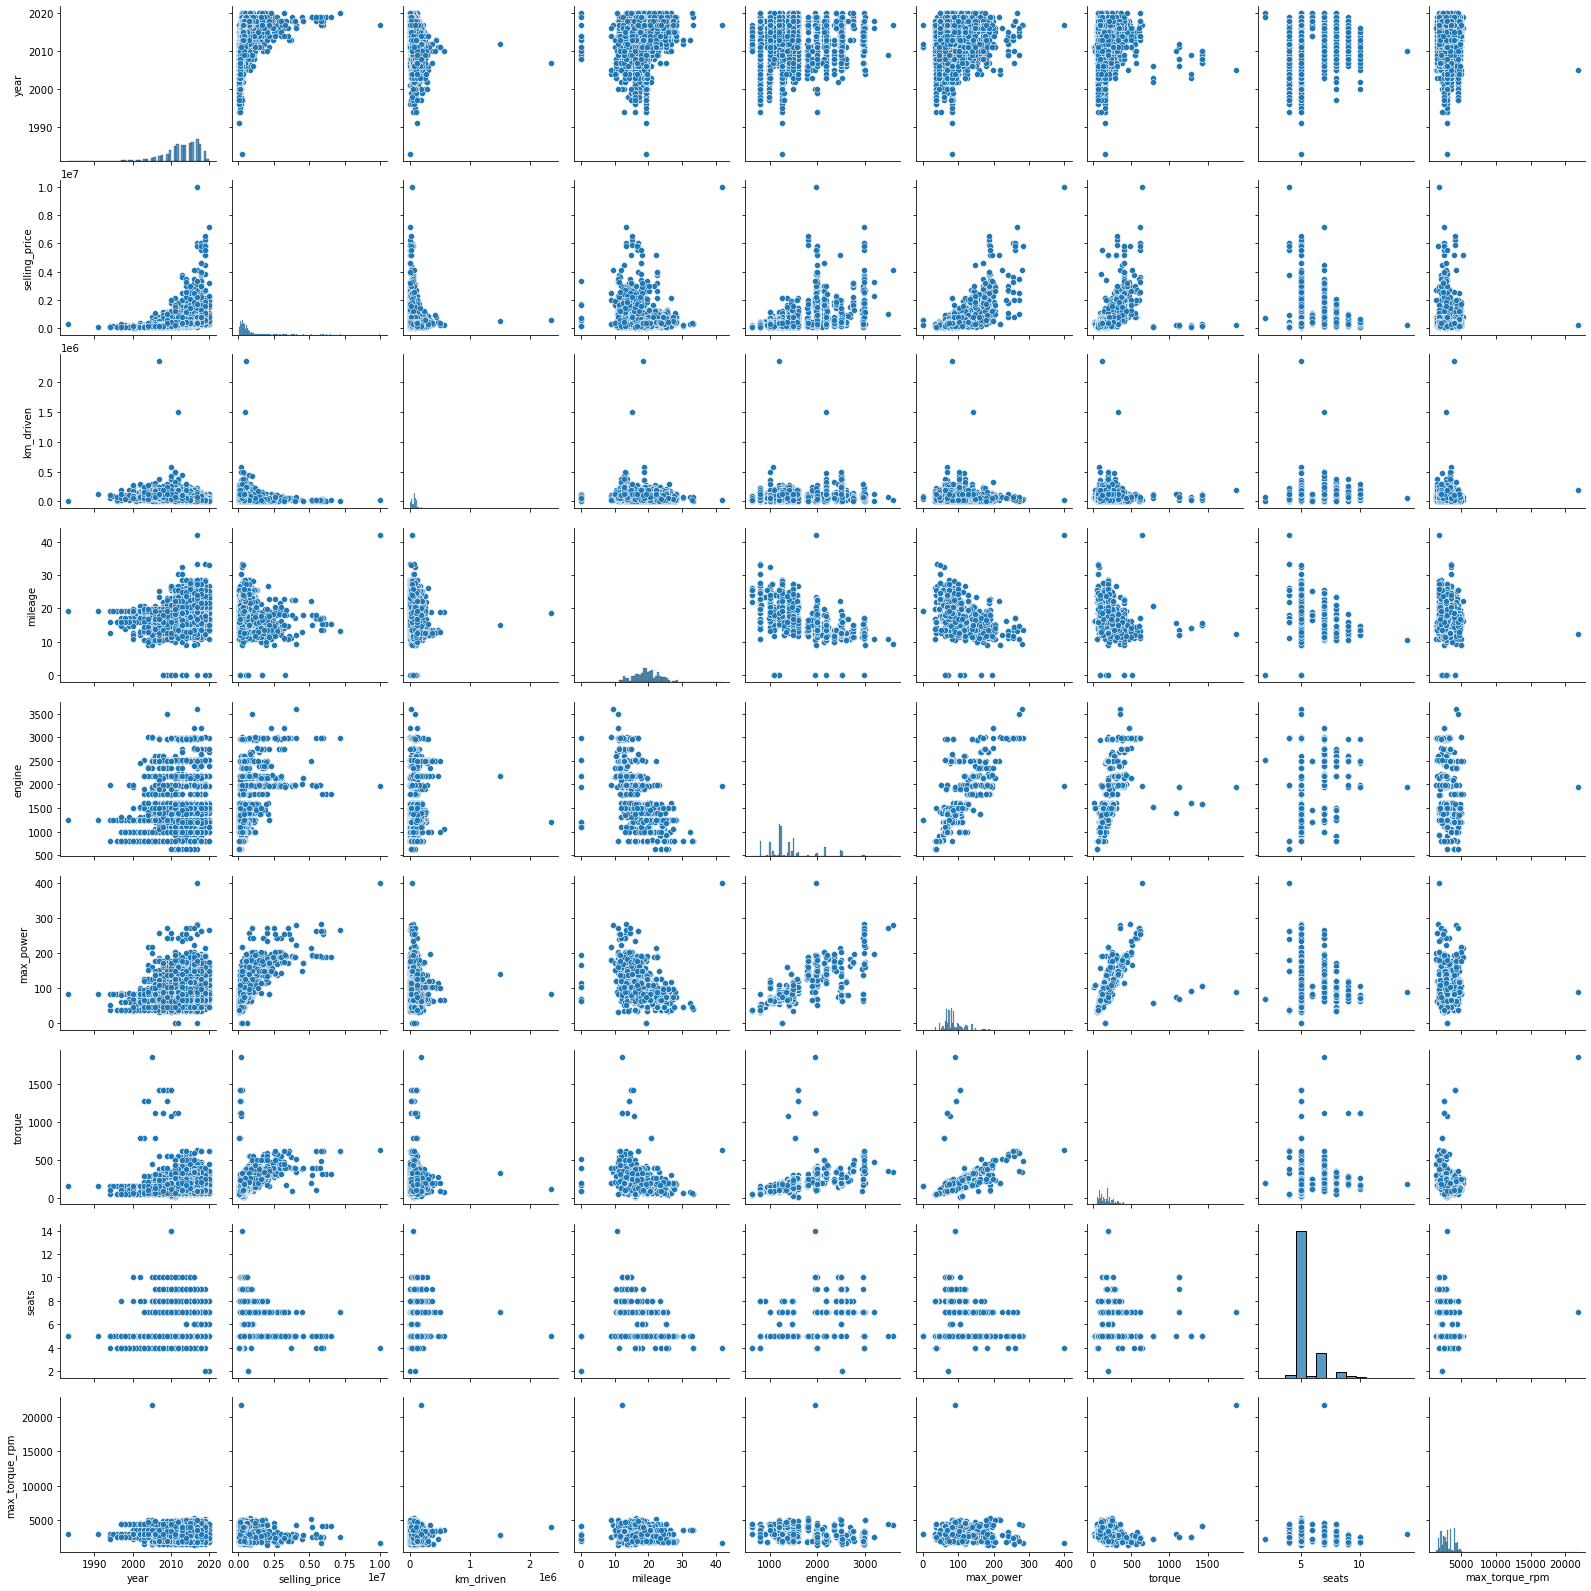

In [41]:
sns.pairplot(df_train_no_mis);

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

🦉 **Ответ:** 

🐼 Наблюдается визуально и логически обоснованная связь признаков года выпуска авто и ее стоимостью, еще пробега и стоимостью.

🐼 Также на графиках можно заметить линейную зависимость переменных:
- engine & max_power
- max_power & torque
- mileage & engine

Например, график последней пары признаков

Text(0, 0.5, 'Fuel efficiency')

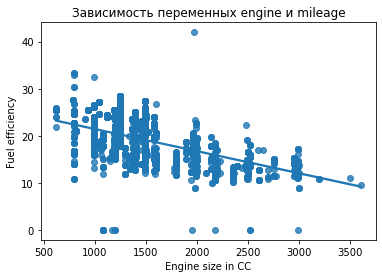

In [54]:
sns.regplot(
    x='engine', 
    y='mileage', 
    data=df_train_no_mis)
plt.title('Зависимость переменных engine и mileage')
plt.xlabel(
    'Engine size in CC')
plt.ylabel(
    'Fuel efficiency')

🐼 Есть предположение о зависимости еще признаков *selling_price* и *torque*

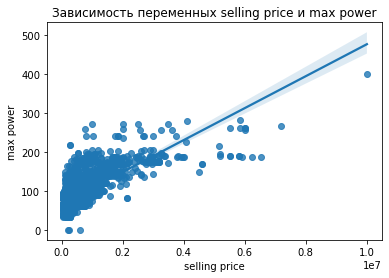

In [65]:
sns.regplot(
    x='selling_price', 
    y='max_power', 
    data=df_train_no_mis)
plt.title('Зависимость переменных selling price и max power')
plt.xlabel(
    'selling price')
plt.ylabel(
    'max power');

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

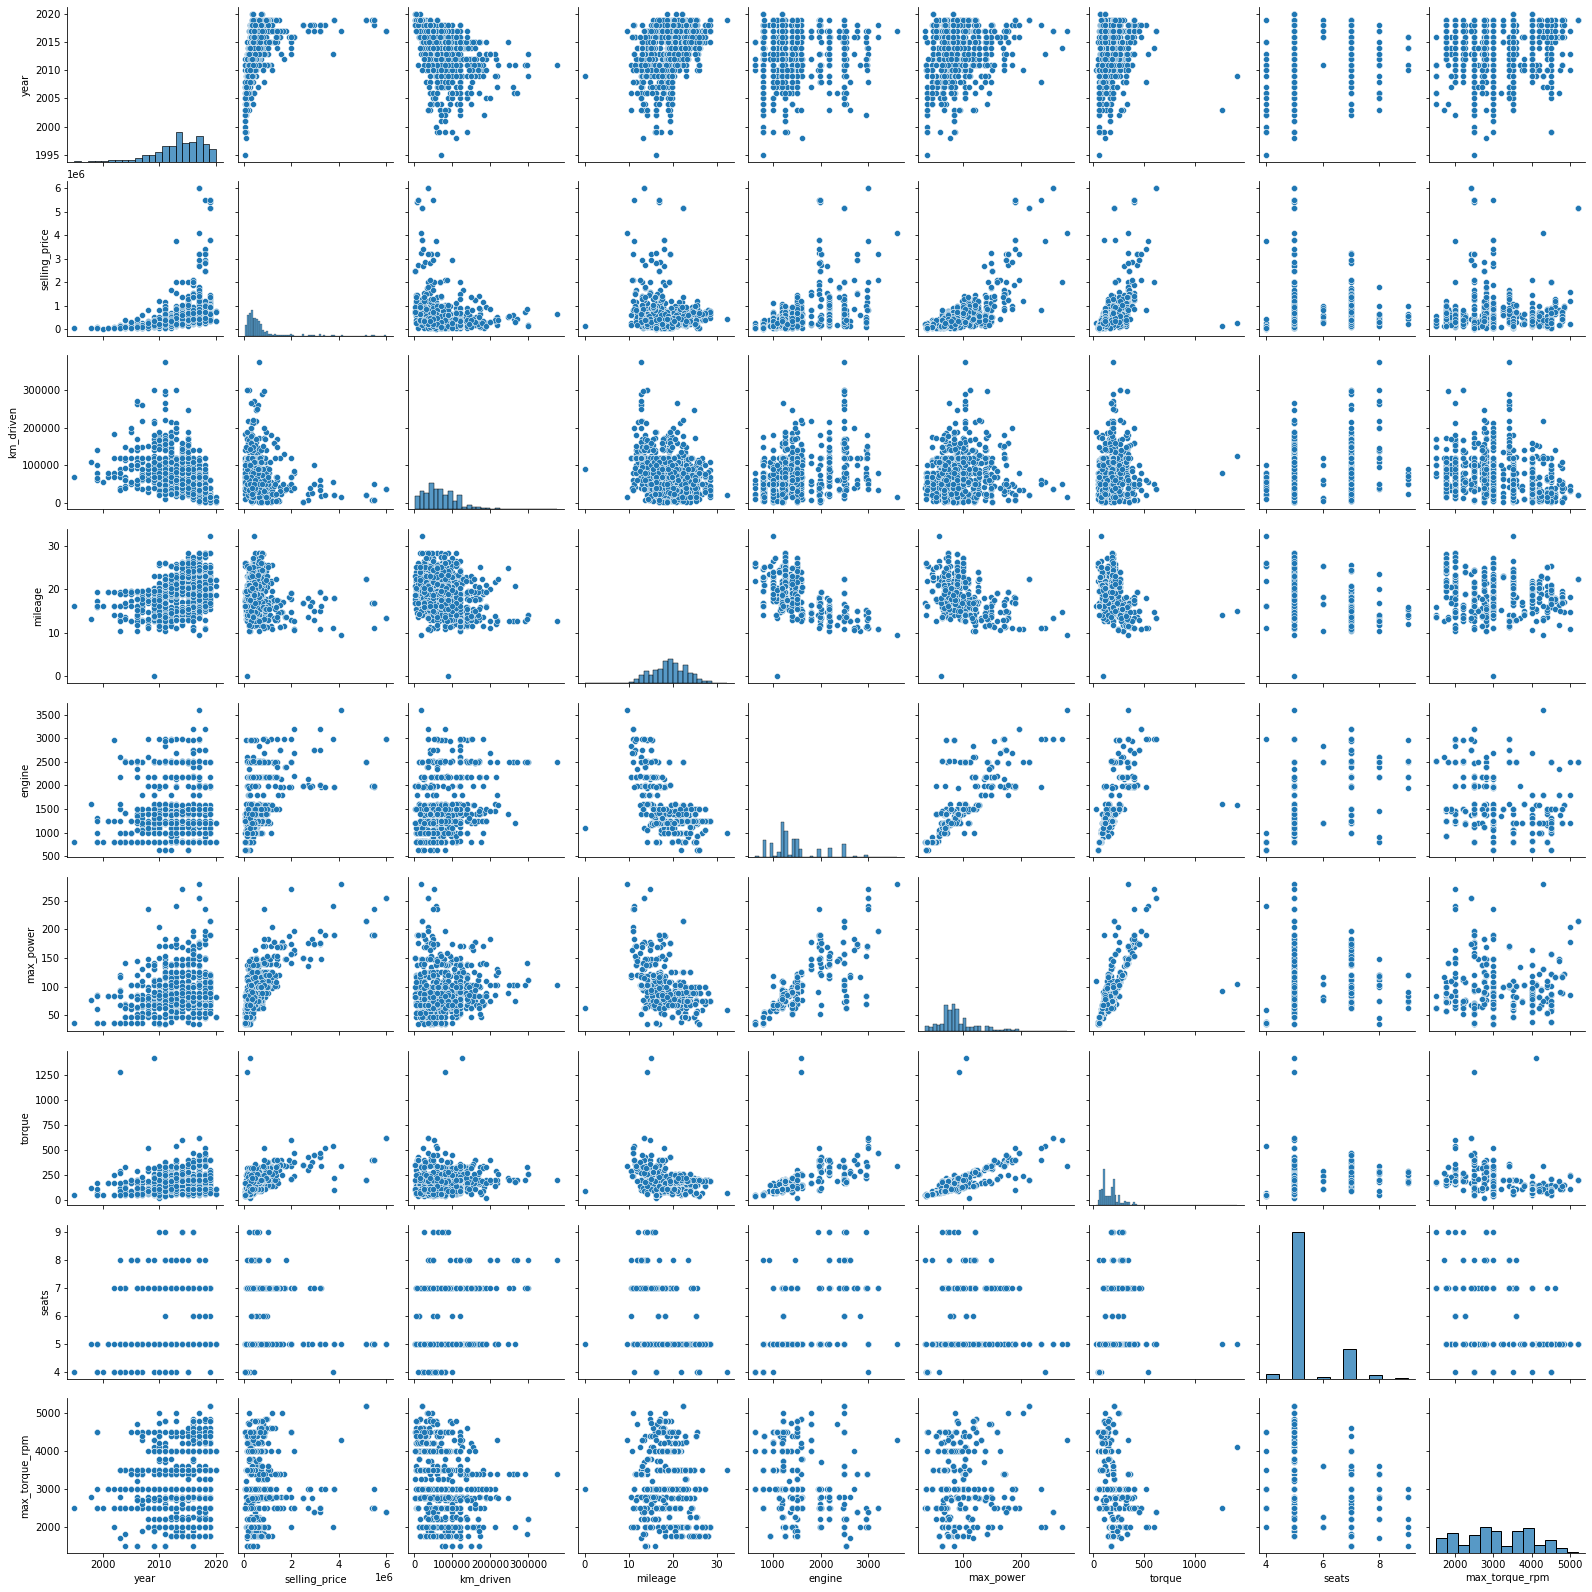

In [42]:
sns.pairplot(df_test_no_mis);

🦉 **Ответ:** В принципе зависмость и распределение переменных сохраняется в обоих датасетах.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

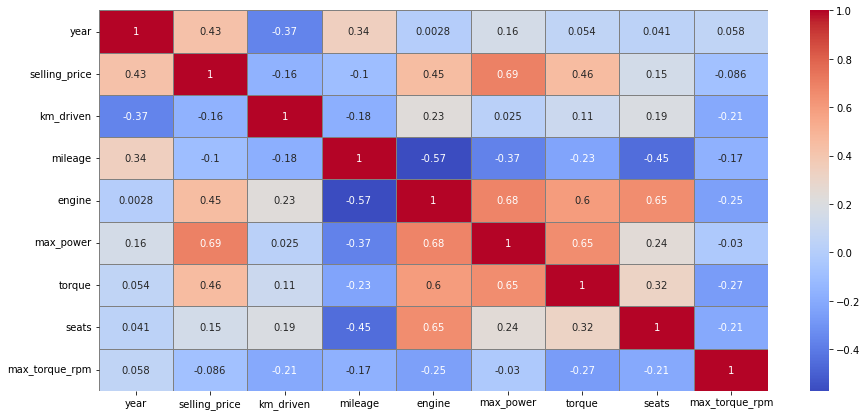

In [37]:
plt.figure(figsize = (15,7))
sns.heatmap(df_train_no_mis_real.corr(), annot = True, fmt='.2g', cmap= 'coolwarm', linewidths=1, linecolor='grey');

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

🦉 **Ответ:** 

- Судя по тепловой карте двумя наименее скоррелированными признаками являются engine и year, их значение корреляции равно 0.0028
- Положительная линейная зависимость наблюдается у признаков:
     - целевая переменная selling_price и max_power (0.69)
     - engine и max_power (0.68)
     - engine и seats (0.65)
     - torque и max_power (0.65)
- согласно значению корреляции данных признаков (-0.37), есть отрицательная линейная зависимость, но не очень явная.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

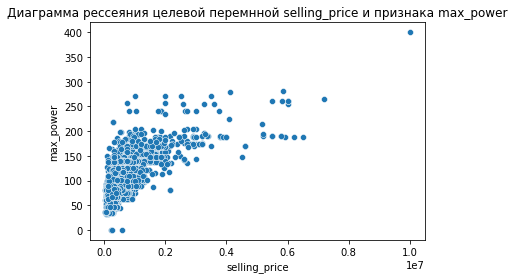

In [74]:
sns.scatterplot(
    x='selling_price', 
    y='max_power', 
    data=df_train_no_mis).set(title='Диаграмма рессеяния целевой перемнной selling_price и признака max_power');

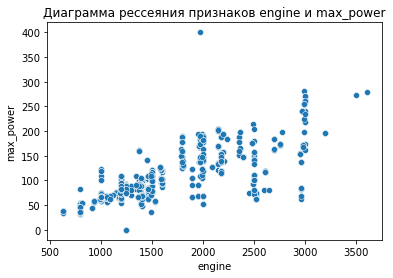

In [75]:
sns.scatterplot(
    x='engine', 
    y='max_power', 
    data=df_train_no_mis).set(title='Диаграмма рессеяния признаков engine и max_power');

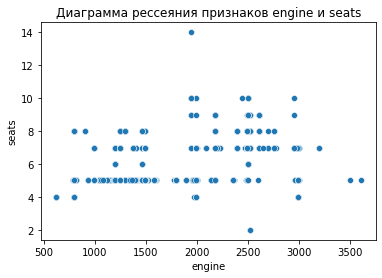

In [77]:
sns.scatterplot(
    x='engine', 
    y='seats', 
    data=df_train_no_mis).set(title='Диаграмма рессеяния признаков engine и seats');

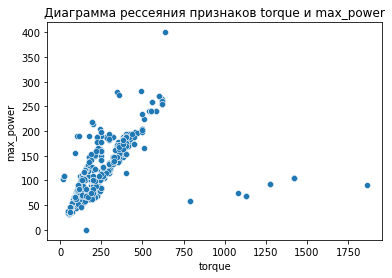

In [78]:
sns.scatterplot(
    x='torque', 
    y='max_power', 
    data=df_train_no_mis).set(title='Диаграмма рессеяния признаков torque и max_power');

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

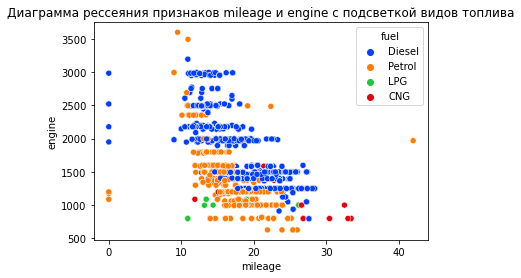

In [38]:
sns.scatterplot(
    x='mileage',
    y='engine', 
    data=df_train_no_mis,
    palette='bright',
    hue='fuel').set(title='Диаграмма рессеяния признаков mileage и engine c подсветкой видов топлива');

🐼 здесь заметна кластеризация точек

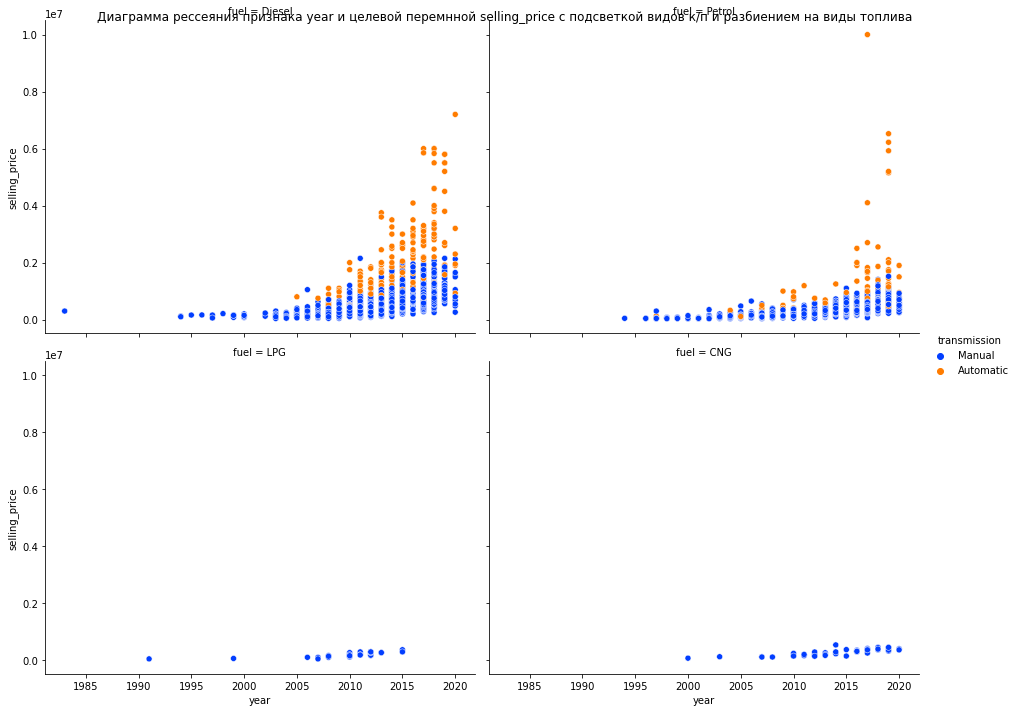

In [148]:
sns.relplot(
    x='year', 
    y='selling_price', 
    data=df_train_no_mis,
    palette='bright',
    height=5, aspect=1.3,
    kind='scatter', 
    hue='transmission',
    col='fuel',
    col_wrap=2).fig.suptitle('Диаграмма рессеяния признака year и целевой перемнной selling_price c подсветкой видов к/п и разбиением на виды топлива');

🐼 здесь тоже точки оранжевые, к/п которых автомат, 'всплыли' по цене выше синих

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [17]:
y_train = df_train_no_mis['selling_price']
X_train = df_train_no_mis_real.drop(['selling_price'], axis=1)
X_train

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
0,2014.0,145500.0,23.40,1248.0,74.00,190.00000,5.0,2000.0
1,2014.0,120000.0,21.14,1498.0,103.52,250.00000,5.0,2500.0
2,2010.0,127000.0,23.00,1396.0,90.00,219.67008,5.0,2750.0
3,2007.0,120000.0,16.10,1298.0,88.20,112.77705,5.0,4500.0
4,2017.0,45000.0,20.14,1197.0,81.86,113.75000,5.0,4000.0
...,...,...,...,...,...,...,...,...
5835,2008.0,191000.0,17.92,1086.0,62.10,96.10000,5.0,3000.0
5836,2013.0,50000.0,18.90,998.0,67.10,90.00000,5.0,3500.0
5837,2013.0,110000.0,18.50,1197.0,82.85,113.70000,5.0,4000.0
5838,2007.0,119000.0,16.80,1493.0,110.00,235.36080,5.0,1900.0


In [40]:
assert X_train.shape == (5840, 6)

AssertionError: 

🦊 Ошибка потому, что вместо удаления признака *torque* я добавила два признака числовых *torque* и *max_torque_rpm*.

In [18]:
y_test = df_test_no_mis['selling_price']
X_test = df_test_no_mis_real.drop(['selling_price'], axis=1)

In [42]:
assert X_test.shape == (1000, 6)

AssertionError: 

🦊 Написала сверху причину ошибки!

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

model_LR = LinearRegression()

model_LR.fit(X_train, y_train)

pred_LR = model_LR.predict(X_test)

print('mse for test data:', mean_squared_error(y_test, pred_LR))

print('r2 score for test data:', r2_score(y_test, pred_LR))

print('r2 score for train data:', r2_score(y_train, model_LR.predict(X_train)))

mse for test data: 230351326790.91708
r2 score for test data: 0.5992695134376667
r2 score for train data: 0.5998994823560508


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.fit_transform(X_test) 

df_train_scaled = pd.DataFrame(data=X_train_scaled)

model_LR.fit(X_train_scaled, y_train)

pred_LR = model_LR.predict(X_test_scaled)

print('mse for test data:', mean_squared_error(y_test, pred_LR))

print('r2 score for test data:',r2_score(y_test, pred_LR))

print('r2 score for train data:',r2_score(y_train, model_LR.predict(X_train_scaled)))

df_train_scaled

mse for test data: 246144271541.5253
r2 score for test data: 0.5717953307518961
r2 score for train data: 0.5998994823560506


,0,1,2,3,4,5,6,7
0,0.139570,1.191152,0.995867,-0.373643,-0.439550,0.141845,-0.434419,-1.135038
1,0.139570,0.766619,0.428830,0.141162,0.493513,0.701692,-0.434419,-0.589213
2,-0.837167,0.883158,0.895506,-0.068879,0.066175,0.418690,-0.434419,-0.316300
3,-1.569719,0.766619,-0.835712,-0.270682,0.009281,-0.578704,-0.434419,1.594089
4,0.872122,-0.482007,0.177929,-0.478663,-0.191113,-0.569626,-0.434419,1.048264
...,...,...,...,...,...,...,...,...
5835,-1.325535,1.948653,-0.379072,-0.707236,-0.815684,-0.734314,-0.434419,-0.043387
5836,-0.104614,-0.398765,-0.133189,-0.888447,-0.657645,-0.791232,-0.434419,0.502438
5837,-0.104614,0.600136,-0.233549,-0.478663,-0.159821,-0.570093,-0.434419,1.048264
5838,-1.569719,0.749971,-0.660081,0.130865,0.698332,0.565097,-0.434419,-1.244203


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [37]:
print(model_LR.coef_)

[165154.5264186  -48621.90956742  -5365.86292138  25821.48881955
 328764.21307826   5298.87551245 -29717.24240643 -55019.66019653]


🦉 **Ответ:** наиболее информативными признаками являются признаки с наибольшими весами max_power (328764.21307826) и year (165154.5264186).

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [22]:
from sklearn.linear_model import Lasso

model_lasso = Lasso()

model_lasso.fit(X_train_scaled, y_train)

pred_lasso = model_lasso.predict(X_test_scaled)

print('mse for test data:', mean_squared_error(y_test, pred_lasso))

print('r2 score for test data:',r2_score(y_test, pred_lasso))

print('r2 score for train data:',r2_score(y_train, model_lasso.predict(X_train_scaled)))

mse for test data: 246145107877.7933
r2 score for test data: 0.5717938758202303
r2 score for train data: 0.5998994823087727


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [40]:
print(model_lasso.coef_)
model_lasso.intercept_

[165152.31463569 -48620.96630956  -5362.59650005  25819.47372295
 328765.65575032   5298.2018434  -29713.26310606 -55017.5983345 ]


522960.0910958864

🦉 **Ответ:** нет, не занулила, надо задавать параметры c умом.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [41]:
from sklearn.model_selection import RepeatedKFold, GridSearchCV

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.linspace(0.1, 10, num = 100)
# define search
search_lasso = GridSearchCV(model_lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results_lasso = search_lasso.fit(X_train_scaled, y_train)
# summarize
print('MAE: %.3f' % results_lasso.best_score_)
print('Config: %s' % results_lasso.best_params_)

MAE: -181576.463
Config: {'alpha': 10.0}


In [42]:
print('r2 score for test data:',r2_score(y_test, search_lasso.predict(X_test_scaled)))
print('r2 score for train data:',r2_score(y_train, search_lasso.predict(X_train_scaled)))

r2 score for test data: 0.5717807394291808
r2 score for train data: 0.5998994775509561


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [43]:
from sklearn.linear_model import ElasticNet


model_EN = ElasticNet()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.linspace(0.01, 10, num = 1000)
#grid['l1_ratio'] = np.arange(0.001, 1, 0.01)
# define search
search_EN = GridSearchCV(model_EN, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results_EN = search_EN.fit(X_train_scaled, y_train)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [44]:
# summarize
print('MAE: %.3f' % results_EN.best_score_)
print('Config: %s' % results_EN.best_params_)

MAE: -167794.572
Config: {'alpha': 0.8400000000000001}


In [45]:
print('r2 score for test data:',r2_score(y_test, search_EN.predict(X_test_scaled)))
print('r2 score for train data:',r2_score(y_train, search_EN.predict(X_train_scaled)))

r2 score for test data: 0.49264830327460385
r2 score for train data: 0.5609290518032712


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [23]:
X_train_cat = df_train_no_mis.drop(['selling_price', 'name'], axis=1)
X_test_cat = df_test_no_mis.drop(['selling_price', 'name'], axis=1)

In [47]:
X_train_cat

,year,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm,fuel,seller_type,transmission,owner
0,2014.0,145500.0,23.40,1248,74.00,190.00000,5,2000.0,Diesel,Individual,Manual,First Owner
1,2014.0,120000.0,21.14,1498,103.52,250.00000,5,2500.0,Diesel,Individual,Manual,Second Owner
2,2010.0,127000.0,23.00,1396,90.00,219.67008,5,2750.0,Diesel,Individual,Manual,First Owner
3,2007.0,120000.0,16.10,1298,88.20,112.77705,5,4500.0,Petrol,Individual,Manual,First Owner
4,2017.0,45000.0,20.14,1197,81.86,113.75000,5,4000.0,Petrol,Individual,Manual,First Owner
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008.0,191000.0,17.92,1086,62.10,96.10000,5,3000.0,Petrol,Individual,Manual,First Owner
5836,2013.0,50000.0,18.90,998,67.10,90.00000,5,3500.0,Petrol,Individual,Manual,Second Owner
5837,2013.0,110000.0,18.50,1197,82.85,113.70000,5,4000.0,Petrol,Individual,Manual,First Owner
5838,2007.0,119000.0,16.80,1493,110.00,235.36080,5,1900.0,Diesel,Individual,Manual,Fourth & Above Owner


In [58]:
assert X_train_cat.shape == (5840, 10)

AssertionError: 

🦊 Ошибка из-за признаков 'torque' и 'max_torque_rpm'.

In [48]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [24]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas
from sklearn.compose import make_column_transformer


transformer = make_column_transformer(
    (OneHotEncoder(), ['fuel', 'seller_type', 'transmission', 'owner', 'seats']),
    remainder='passthrough')

transformed = transformer.fit_transform(X_train_cat)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
X_train_data = transformed_df
X_train_data

,onehotencoder__fuel_CNG,onehotencoder__fuel_Diesel,onehotencoder__fuel_LPG,onehotencoder__fuel_Petrol,onehotencoder__seller_type_Dealer,onehotencoder__seller_type_Individual,onehotencoder__seller_type_Trustmark Dealer,onehotencoder__transmission_Automatic,onehotencoder__transmission_Manual,onehotencoder__owner_First Owner,...,onehotencoder__seats_9,onehotencoder__seats_10,onehotencoder__seats_14,remainder__year,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__torque,remainder__max_torque_rpm
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2014.0,145500.0,23.40,1248.0,74.00,190.00000,2000.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2014.0,120000.0,21.14,1498.0,103.52,250.00000,2500.0
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2010.0,127000.0,23.00,1396.0,90.00,219.67008,2750.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2007.0,120000.0,16.10,1298.0,88.20,112.77705,4500.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2017.0,45000.0,20.14,1197.0,81.86,113.75000,4000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2008.0,191000.0,17.92,1086.0,62.10,96.10000,3000.0
5836,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2013.0,50000.0,18.90,998.0,67.10,90.00000,3500.0
5837,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2013.0,110000.0,18.50,1197.0,82.85,113.70000,4000.0
5838,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2007.0,119000.0,16.80,1493.0,110.00,235.36080,1900.0


In [25]:
transformer = make_column_transformer(
    (OneHotEncoder(), ['fuel', 'seller_type', 'transmission', 'owner', 'seats']),
    remainder='passthrough')

transformed = transformer.fit_transform(X_test_cat)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names_out())
X_test_data = transformed_df
X_test_data

,onehotencoder__fuel_CNG,onehotencoder__fuel_Diesel,onehotencoder__fuel_LPG,onehotencoder__fuel_Petrol,onehotencoder__seller_type_Dealer,onehotencoder__seller_type_Individual,onehotencoder__seller_type_Trustmark Dealer,onehotencoder__transmission_Automatic,onehotencoder__transmission_Manual,onehotencoder__owner_First Owner,...,onehotencoder__seats_7,onehotencoder__seats_8,onehotencoder__seats_9,remainder__year,remainder__km_driven,remainder__mileage,remainder__engine,remainder__max_power,remainder__torque,remainder__max_torque_rpm
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,2010.0,168000.0,14.00,2498.0,112.00,260.00000,2200.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2017.0,25000.0,21.50,1497.0,108.50,260.00000,2750.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,2007.0,218463.0,12.90,1799.0,130.00,172.00000,4300.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2015.0,173000.0,25.10,1498.0,98.60,200.00000,1750.0
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2011.0,70000.0,16.50,1172.0,65.00,96.00000,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2008.0,100000.0,19.81,1086.0,68.05,99.04000,4500.0
996,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,2017.0,50000.0,18.60,1197.0,81.83,114.70000,4000.0
997,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2009.0,40000.0,23.00,1396.0,90.00,219.67008,2750.0
998,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,2012.0,25000.0,20.36,1197.0,78.90,111.80000,4000.0


🐸 Два датасета отличаются после кодирования:

In [26]:
diff =  list(set(list(X_train_data.keys())) - set(list(X_test_data.keys())))
print("В тестовом датасете не хватает следующих признаков:", diff)

В тестовом датасете не хватает следующих признаков: ['onehotencoder__seats_2', 'onehotencoder__seats_10', 'onehotencoder__seats_14']


In [27]:
for i in diff:
    X_test_data[i] = np.zeros(X_test_data.shape[0])
X_test_data = X_test_data[list(X_train_data.keys())] # выравниваем

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

model_Ridge = Ridge()
# define model evaluation method
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.linspace(0.01, 10, num = 100)
#grid['l1_ratio'] = np.arange(0.001, 1, 0.01)
# define search
search_Ridge = GridSearchCV(model_Ridge, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results_Ridge = search_Ridge.fit(X_train_data, y_train)

NameError: name 'RepeatedKFold' is not defined

In [54]:
# summarize
print('MAE: %.3f' % results_Ridge.best_score_)
print('Config: %s' % results_Ridge.best_params_)

MAE: -173549.772
Config: {'alpha': 0.01}


In [55]:
print('mse for test data:', mean_squared_error(y_test, search_Ridge.predict(X_test_data)))
print('r2 score for test data:',r2_score(y_test, search_Ridge.predict(X_test_data)))
print('r2 score for train data:',r2_score(y_train, search_Ridge.predict(X_train_data)))

mse for test data: 211771516426.46835
r2 score for test data: 0.6315918644799052
r2 score for train data: 0.6724873805226363


🐘 **Получилось повысить качество предсказаний** 

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

pipe_model_LR2 = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures(degree = 2)),
    ('model', LinearRegression())
])
pipe_model_Lasso2 = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures(degree = 2)),
    ('model', Lasso(alpha=10.0))
])
pipe_model_Lasso3 = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures(degree = 3)),
    ('model', Lasso(alpha=10.0))
])
pipe_model_EN2 = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures(degree = 2)),
    ('model', ElasticNet(alpha=0.84))
])
pipe_model_Ridge2 = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures(degree = 2)),
    ('model', Ridge(alpha=0.01))
])
pipe_model_Ridge3 = Pipeline([
    ('scaler', StandardScaler()),
    ('features', PolynomialFeatures(degree = 3)),
    ('model', Ridge(alpha=0.01))
])

In [57]:
pipe_model_LR2.fit(X_train_data, y_train)

pred_LR2 = pipe_model_LR2.predict(X_test_data)

print('Пайплайн для линейной регрессии без регуляризации c полиномиальными фичами 2-й степени:\n')
print('mse for test data:', mean_squared_error(y_test, pred_LR2))
print('r2 score for test data:',r2_score(y_test, pred_LR2))
print('r2 score for train data:',r2_score(y_train, pipe_model_LR2.predict(X_train_data)))

Пайплайн для линейной регрессии без регуляризации c полиномиальными фичами 2-й степени:

mse for test data: 1.126713635634966e+34
r2 score for test data: -1.96008640242926e+22
r2 score for train data: 0.8798474516170472


🦡 дикое переобучение для простой линейной регрессии без регуляризации!!!

In [70]:
pipe_model_Lasso2.fit(X_train_data, y_train)

pred_Lasso2 = pipe_model_Lasso2.predict(X_test_data)

print('Пайплайн для метода Лассо c полиномиальными фичами 2-й степени:\n')
print('mse for test data:', mean_squared_error(y_test, pred_Lasso2))
print('r2 score for test data:',r2_score(y_test, pred_Lasso2))
print('r2 score for train data:',r2_score(y_train, pipe_model_Lasso2.predict(X_train_data)))

Пайплайн для метода Лассо c полиномиальными фичами 2-й степени:

mse for test data: 69844305985.37312
r2 score for test data: 0.8784954134580193
r2 score for train data: 0.8799284288208244


/home/dinara/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.328e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


In [71]:
#get weight coefficients for pipeline_Lasso2
#print(pipe_model_Lasso2.named_steps['model'].coef_)

In [135]:
pipe_model_EN2.fit(X_train_data, y_train)

pred_EN2 = pipe_model_EN2.predict(X_test_data)

print('Пайплайн для метода ElasticNet c полиномиальными фичами 2-й степени:\n')
print('mse for test data:', mean_squared_error(y_test, pred_EN2))
print('r2 score for test data:',r2_score(y_test, pred_EN2))
print('r2 score for train data:',r2_score(y_train, pipe_model_EN2.predict(X_train_data)))

Пайплайн для метода ElasticNet c полиномиальными фичами 2-й степени:

mse for test data: 93178794764.83507
r2 score for test data: 0.8379015902205063
r2 score for train data: 0.844496392303036


In [73]:
model_Ridge2 = pipe_model_Ridge2.fit(X_train_data, y_train)

pred_Ridge2 = pipe_model_Ridge2.predict(X_test_data)

print('Пайплайн для метода Ridge c полиномиальными фичами 2-й степени:\n')
print('mse for test data:', mean_squared_error(y_test, pred_Ridge2))
print('r2 score for test data:',r2_score(y_test, pred_Ridge2))
print('r2 score for train data:',r2_score(y_train, pipe_model_Ridge2.predict(X_train_data)))

Пайплайн для метода Ridge c полиномиальными фичами 2-й степени:

mse for test data: 70794919653.68483
r2 score for test data: 0.8768416792115432
r2 score for train data: 0.8799651456119109


In [137]:
pipe_model_Ridge3.fit(X_train_data, y_train)

pred_Ridge3 = pipe_model_Ridge3.predict(X_test_data)

print('Пайплайн для метода Ridge c полиномиальными фичами 3-й степени:\n')
print('mse for test data:', mean_squared_error(y_test, pred_Ridge3))
print('r2 score for test data:',r2_score(y_test, pred_Ridge3))
print('r2 score for train data:',r2_score(y_train, pipe_model_Ridge3.predict(X_train_data)))

Пайплайн для метода Ridge c полиномиальными фичами 3-й степени:

mse for test data: 57378375525.99054
r2 score for test data: 0.9001817586075519
r2 score for train data: 0.9402093183177211


🦡 есть заметное переобучение!!!

🐘 Получилось улучшить качество предсказаний с помощью генерации новых полиномиальных признаков. Наилучший результат для Lasso с полиномиальными признаками 3-й степени:

In [75]:
pipe_model_Lasso3.fit(X_train_data, y_train)

pred_Lasso3 = pipe_model_Lasso3.predict(X_test_data)

print('Пайплайн для метода Лассо c полиномиальными фичами 3-й степени:\n')
print('mse for test data:', mean_squared_error(y_test, pred_Lasso3))
print('r2 score for test data:',r2_score(y_test, pred_Lasso3))
print('r2 score for train data:',r2_score(y_train, pipe_model_Lasso3.predict(X_train_data)))

Пайплайн для метода Лассо c полиномиальными фичами 3-й степени:

mse for test data: 38494404939.173874
r2 score for test data: 0.9330332417177513
r2 score for train data: 0.9355095159664175


/home/dinara/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.520e+13, tolerance: 1.674e+11
  model = cd_fast.enet_coordinate_descent(


# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [77]:
def business_metrics(y_true, y_pred):
    count = 0
    for i in range(len(y_true)):
        if abs(y_true[i] - y_pred[i]) *1.0 <= 0.1 * y_true[i]:
            count += 1
    return count * 1.0 / len(y_true) * 100

print('Пайплайн для метода Ridge c полиномиальными фичами 2-й степени:\n')

print('r2 score for test data:',r2_score(y_test, pred_Ridge2))

print('Бизнес метрика:')

print(business_metrics(y_test, pred_Ridge2), '%\n')

print('Пайплайн для метода Лассо c полиномиальными фичами 3-й степени:\n')

print('r2 score for test data:',r2_score(y_test, pred_Lasso3))

print('Бизнес метрика:')

print(business_metrics(y_test, pred_Lasso3), '%\n')

Пайплайн для метода Ridge c полиномиальными фичами 2-й степени:

r2 score for test data: 0.8768416792115432
Бизнес метрика:
31.5 %

Пайплайн для метода Лассо c полиномиальными фичами 3-й степени:

r2 score for test data: 0.9330332417177513
Бизнес метрика:
33.7 %



In [1]:
import joblib
import custom_transformer
from custom_transformer import FilterOutBigValuesTransformer

#save pipeline
#joblib.dump(pipe_model_Lasso2, 'pipe.joblib');

In [29]:
#load saved pipeline
pipeline = joblib.load('pipe.joblib')

# check prediction
pred = pipeline.predict(X_test_data)

print('r2 score for test data:',r2_score(y_test,pred))

r2 score for test data: 0.8784954134580193


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link

## Спасибо за проверку ДЗ! 🐕